In [1]:
# Install required libraries
#!pip install scikit-learn diplslib pandas

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.utils.estimator_checks import check_estimator
from diPLSlib.models import DIPLS, GCTPLS

In [2]:
# Validate the DIPLS model
dipls = DIPLS()
checks=check_estimator(dipls, generate_only=True)

In [3]:
for name, check in checks:
    print(f"Running check: {name}")
    check(dipls)

Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()
Running check: DIPLS()


In [5]:
# Validate GCTPLS model
gctpls = GCTPLS()
check_estimator(gctpls)


In [ ]:
# Load and read the data
url = "https://github.com/RNL1/Melamine-Dataset/blob/master/Melamine_Dataset.pkl?raw=true"
data = pd.read_pickle(url)

wn1 = data['wn1']
wn2 = data['wn2']
w = np.hstack((wn1, wn2))

Xs = np.hstack((data['R861']['X1'], data['R861']['X2']))
Xt = np.hstack((data['R568']['X1'], data['R568']['X2']))

ys = data['R861']['Y']
yt = data['R568']['Y']


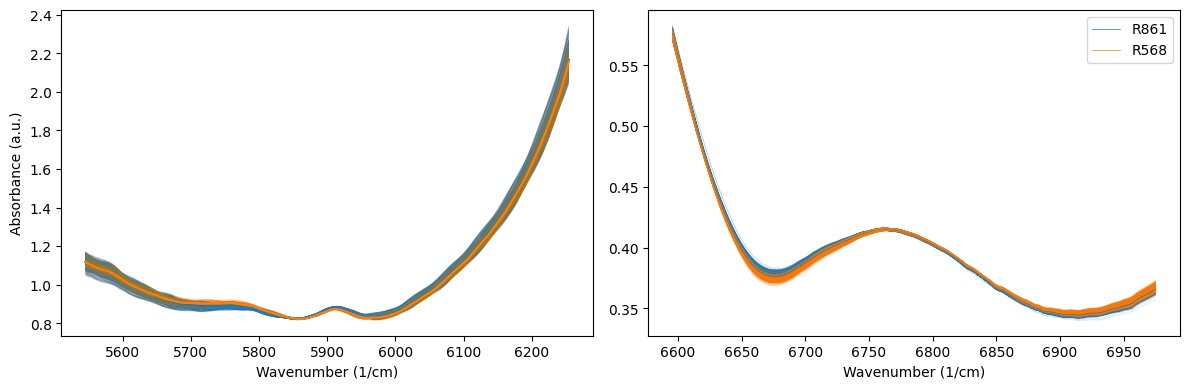

In [ ]:
# Plot the data
f, ax = plt.subplots(1,2,figsize=(12, 4))
ax[0].plot(wn1,data['R861']['X1'].T,color="#1f77b4",linewidth=0.03,linestyle=':')
ax[0].plot(wn1,data['R568']['X1'].T,color="#ff7f0e",linewidth=0.03,linestyle=':')

s, = ax[0].plot(wn1,np.mean(data['R861']['X1'],axis=0),color="#1f77b4",label='Source')
t, = ax[0].plot(wn1,np.mean(data['R568']['X1'],axis=0),color="#ff7f0e",label='Target')

ax[0].set_ylabel('Absorbance (a.u.)')
ax[0].set_xlabel('Wavenumber (1/cm)')

ax[1].plot(wn2,data['R861']['X2'].T,color="#1f77b4",linewidth=0.1,linestyle=':')
ax[1].plot(wn2,data['R568']['X2'].T,color="#ff7f0e",linewidth=0.1,linestyle=':')
ax[1].set_xlabel('Wavenumber (1/cm)')

s, = ax[1].plot(wn2,np.mean(data['R861']['X2'],axis=0),linewidth=0.5,color="#1f77b4",label='Source')
t, = ax[1].plot(wn2,np.mean(data['R568']['X2'],axis=0),linewidth=0.5,color="#ff7f0e",label='Target')

plt.legend([s,t], ['R861', 'R568'])
plt.tight_layout()

AssertionError: Estimator DIPLS doesn't seem to fail gracefully on sparse data: error message should state explicitly that sparse input is not supported if this is not the case, e.g. by using check_array(X, accept_sparse=False).

In [ ]:

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_components': [2, 3, 4, 5],
    'scale': [True, False]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=dipls, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Perform cross-validation prediction
y_pred = cross_val_predict(grid_search.best_estimator_, X, y, cv=5)

# Print the predictions
print("Cross-validation predictions: ", y_pred)